EDA


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("../data/raw/airbnb_eng.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102058 entries, 0 to 102057
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102058 non-null  int64  
 1   host_id                         102058 non-null  int64  
 2   host_identity_verified          102058 non-null  object 
 3   host_name                       102058 non-null  object 
 4   neighbourhood_group             102058 non-null  object 
 5   neighbourhood                   102058 non-null  object 
 6   lat                             102058 non-null  float64
 7   long                            102058 non-null  float64
 8   instant_bookable                102058 non-null  bool   
 9   cancellation_policy             102058 non-null  object 
 10  room_type                       102058 non-null  object 
 11  construction_year               102058 non-null  float64
 12  price           

| Column Name                        | Data Type         | Description                                                       |
| ---------------------------------- | ----------------- | ----------------------------------------------------------------- |
| **id**                             | int64             | Unique identifier for each Airbnb listing                         |
| **host_id**                        | int64             | Unique identifier for each host                                   |
| **host_identity_verified**         | object            | Indicates whether the host’s identity is verified by Airbnb       |
| **host_name**                      | object            | Display name of the host (identifier only)                        |
| **neighbourhood_group**            | object            | Borough where the listing is located (Manhattan, Brooklyn, etc.)  |
| **neighbourhood**                  | object            | Specific neighborhood within the borough                          |
| **lat**                            | float64           | Latitude coordinate of the listing                                |
| **long**                           | float64           | Longitude coordinate of the listing                               |
| **instant_bookable**               | bool              | Whether the listing can be booked instantly without host approval |
| **cancellation_policy**            | object            | Cancellation policy set by the host (flexible, moderate, strict)  |
| **room_type**                      | object            | Type of accommodation (Entire home/apt, Private room, etc.)       |
| **construction_year**              | float64           | Year the property was constructed                                 |
| **price**                          | float64           | Nightly price of the listing in USD                               |
| **minimum_nights**                 | float64           | Minimum number of nights required for a booking                   |
| **number_of_reviews**              | float64           | Total number of reviews received by the listing                   |
| **last_review**                    | object (datetime) | Date of the most recent review; missing if no reviews             |
| **review_rate_number**             | float64           | Average review rating score (1–5)                                 |
| **calculated_host_listings_count** | float64           | Number of listings managed by the same host                       |
| **availability_365**               | float64           | Number of days the listing is available in the next 365 days      |
| **has_house_rules**                | bool              | Indicates whether the listing has house rules specified           |
| **occupancy_rate**                 | float64           | Proportion of days booked in a year (1 − availability_365/365)    |
| **fully_unavailable**              | bool              | Indicates listings with zero availability days                    |
| **host_type**                      | object            | Engineered category identifying single vs multi-listing hosts     |


In [16]:
data['id'].nunique()

102058

- Only unique records

In [17]:
data['host_id'].nunique()

102057

In [22]:
data[data['host_id'].duplicated(keep=False)]

,id,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,instant_bookable,cancellation_policy,...,minimum_nights,number_of_reviews,last_review,review_rate_number,calculated_host_listings_count,availability_365,has_house_rules,occupancy_rate,fully_unavailable,host_type
23397,13923499,29531702698,verified,Ann,Queens,Flushing,40.74982,-73.80610,True,flexible,...,3.0,0.0,NaN,2.0,6.0,256.0,False,0.298630,False,Multi-listing Host
42960,24728144,29531702698,verified,Seth,Brooklyn,Williamsburg,40.71867,-73.96163,True,strict,...,2.0,1.0,2019-05-19,3.0,1.0,44.0,True,0.879452,False,Single-listing Host


- Only 1 host id is duplicated so we can remove it safely

In [24]:
data = data.drop_duplicates(subset='host_id', keep='first')


In [25]:
data['host_identity_verified'].value_counts()

host_identity_verified
unconfirmed    51233
verified       50824
Name: count, dtype: int64

In [26]:
data['construction_year'].value_counts()

construction_year
2012.0    5315
2014.0    5220
2008.0    5192
2006.0    5191
2019.0    5174
2009.0    5140
2020.0    5135
2010.0    5128
2022.0    5113
2003.0    5103
2005.0    5098
2007.0    5086
2015.0    5070
2017.0    5038
2011.0    5027
2018.0    5024
2021.0    5009
2004.0    5009
2013.0    4995
2016.0    4990
Name: count, dtype: int64

In [27]:
data['construction_category'] = pd.cut(
    data['construction_year'],
    bins=[0, 2005, 2015, float('inf')],
    labels=['old', 'medium', 'new']
)


C:\Users\sapan\AppData\Local\Temp\ipykernel_29620\1716055804.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['construction_category'] = pd.cut(


In [28]:
data['construction_category'].value_counts()

construction_category
medium    51364
new       35483
old       15210
Name: count, dtype: int64

<Axes: ylabel='price'>

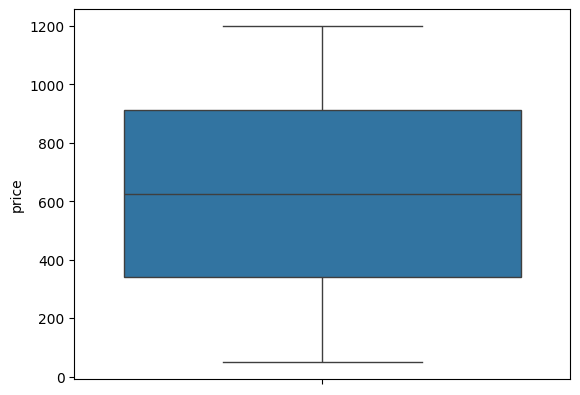

In [29]:
sns.boxplot(data['price'])
plt.show()

In [30]:
data['price'].describe()

count    102057.000000
mean        625.349658
std         331.268722
min          50.000000
25%         341.000000
50%         625.000000
75%         912.000000
max        1200.000000
Name: price, dtype: float64

In [31]:
data['price_category'] = pd.cut(
    data['price'],
    bins=[0, 341, 912, float('inf')],
    labels=['low', 'medium', 'high']
)


C:\Users\sapan\AppData\Local\Temp\ipykernel_29620\2350404596.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price_category'] = pd.cut(


In [32]:
data['price_category'].value_counts()

price_category
medium    50970
low       25591
high      25496
Name: count, dtype: int64

<Axes: ylabel='minimum_nights'>

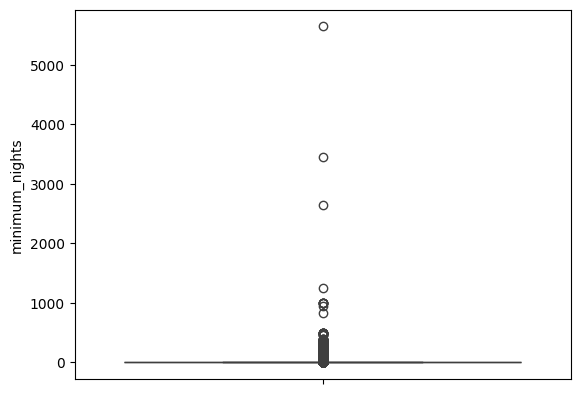

In [34]:
sns.boxplot(data['minimum_nights'])

- Most of they dont have to have minimum nights more than 1 but there are outliers that are present in the dataset

In [41]:
data[data['minimum_nights']== 0].describe()

,id,host_id,lat,long,construction_year,price,minimum_nights,number_of_reviews,review_rate_number,calculated_host_listings_count,availability_365,occupancy_rate
count,1.300000e+01,1.300000e+01,13.000000,13.000000,13.000000,13.000000,13.0,13.000000,13.000000,13.000000,13.000000,13.000000
mean,1.725816e+07,4.941960e+10,40.723038,-73.963659,2013.230769,684.384615,0.0,77.846154,3.307692,1.769231,113.230769,0.689779
std,1.997510e+07,3.810897e+10,0.055185,0.028188,6.647730,392.408490,0.0,76.344446,1.548366,1.165751,135.228297,0.370488
min,1.098541e+06,2.227684e+09,40.643020,-73.997060,2003.000000,73.000000,0.0,0.000000,1.000000,1.000000,0.000000,0.000000
25%,1.233854e+06,7.389895e+09,40.684700,-73.983180,2008.000000,410.000000,0.0,9.000000,2.000000,1.000000,13.000000,0.569863
50%,1.291294e+06,6.213254e+10,40.715340,-73.971130,2012.000000,772.000000,0.0,68.000000,3.000000,1.000000,46.000000,0.873973
75%,2.449507e+07,8.363150e+10,40.766940,-73.950160,2021.000000,920.000000,0.0,129.000000,5.000000,2.000000,157.000000,0.964384
max,5.145781e+07,9.846973e+10,40.817310,-73.890520,2022.000000,1200.000000,0.0,213.000000,5.000000,4.000000,365.000000,1.000000


In [43]:
data['minimum_nights'].value_counts()

minimum_nights
1.0      25290
2.0      23494
3.0      16438
30.0     11554
4.0       6606
         ...  
119.0        1
125.0        1
34.0         1
458.0        1
825.0        1
Name: count, Length: 144, dtype: int64

In [44]:
data.loc[data['minimum_nights'] == 0, 'minimum_nights'] = 1

- As minimum nights of 0 cannot be possible so it is replaced by 1

In [49]:
rare_min_nights = (
    data['minimum_nights']
    .value_counts()
    .reset_index()
)

rare_min_nights.columns = ['minimum_nights', 'count']

rare_min_nights = rare_min_nights[rare_min_nights['count'] < 5]

In [50]:
rare_min_nights.describe()

,minimum_nights,count
count,84.000000,84.000000
mean,366.845238,1.773810
std,763.360934,1.056833
min,33.000000,1.000000
25%,90.000000,1.000000
50%,178.000000,1.000000
75%,334.750000,2.000000
max,5645.000000,4.000000


- As the count of these rare values is very small we can remove them

In [54]:
rare_values = (
    data['minimum_nights']
    .value_counts()
    .loc[lambda x: x < 5]
    .index
)

data = data[~data['minimum_nights'].isin(rare_values)]

In [55]:
data['minimum_nights_category'] = pd.cut(
    data['minimum_nights'],
    bins=[0, 2, 7, 30, 365],
    labels=['Short Stay', 'Weekly', 'Monthly', 'Long-Term'],
    include_lowest=True
)


In [56]:
data['minimum_nights_category'].value_counts()

minimum_nights_category
Short Stay    48797
Weekly        34619
Monthly       16953
Long-Term      1531
Name: count, dtype: int64

In [57]:
data['review_rate_number'].nunique()

5

In [58]:
data['review_rate_number'].value_counts()

review_rate_number
3.0    23424
5.0    23225
4.0    23150
2.0    22940
1.0     9169
Name: count, dtype: int64

In [61]:
data['calculated_host_listings_count'].value_counts()

calculated_host_listings_count
1.0     63334
2.0     14359
3.0      6530
4.0      3526
5.0      1975
        ...  
86.0       21
22.0       20
55.0       15
46.0        9
80.0        7
Name: count, Length: 78, dtype: int64

In [63]:
data[data['calculated_host_listings_count'] == 80]

,id,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,instant_bookable,cancellation_policy,...,review_rate_number,calculated_host_listings_count,availability_365,has_house_rules,occupancy_rate,fully_unavailable,host_type,construction_category,price_category,minimum_nights_category
55360,31576664,54133089457,verified,RoomPicks,Manhattan,Lower East Side,40.72059,-73.98697,False,flexible,...,3.0,80.0,221.0,False,0.394521,False,Multi-listing Host,medium,high,Short Stay
56197,32038939,72485316335,verified,RoomPicks,Manhattan,Lower East Side,40.71918,-73.98897,True,flexible,...,5.0,80.0,364.0,False,0.002740,False,Multi-listing Host,new,high,Short Stay
58546,33336292,38217392099,unconfirmed,RoomPicks,Manhattan,Midtown,40.75187,-73.98424,True,flexible,...,5.0,80.0,363.0,False,0.005479,False,Multi-listing Host,old,medium,Short Stay
61724,35091501,4068244279,unconfirmed,RoomPicks,Manhattan,Midtown,40.75304,-73.98647,False,flexible,...,5.0,80.0,363.0,False,0.005479,False,Multi-listing Host,new,low,Short Stay
61725,35092054,56218987859,unconfirmed,RoomPicks,Manhattan,Midtown,40.75325,-73.98618,False,flexible,...,5.0,80.0,363.0,False,0.005479,False,Multi-listing Host,medium,medium,Short Stay
62290,35404103,61740553111,unconfirmed,RoomPicks,Manhattan,Lower East Side,40.72021,-73.98714,False,flexible,...,3.0,80.0,221.0,False,0.394521,False,Multi-listing Host,medium,high,Short Stay
64634,36698694,38773383562,unconfirmed,RoomPicks,Manhattan,Midtown,40.75124,-73.98598,True,strict,...,5.0,80.0,363.0,False,0.005479,False,Multi-listing Host,old,medium,Short Stay


In [64]:
def categorize_host(count):
    if count == 1:
        return 'Single Listing Host'
    elif 2 <= count <= 4:
        return 'Small Multi-Listing Host'
    elif 5 <= count <= 10:
        return 'Medium Multi-Listing Host'
    else:
        return 'Large / Professional Host'

data['host_category'] = data['calculated_host_listings_count'].apply(categorize_host)


In [65]:
data['host_category'].value_counts()

host_category
Single Listing Host          63334
Small Multi-Listing Host     24415
Large / Professional Host     7723
Medium Multi-Listing Host     6436
Name: count, dtype: int64

# Price depends on ?

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101908 entries, 0 to 102057
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   id                              101908 non-null  int64   
 1   host_id                         101908 non-null  int64   
 2   host_identity_verified          101908 non-null  object  
 3   host_name                       101908 non-null  object  
 4   neighbourhood_group             101908 non-null  object  
 5   neighbourhood                   101908 non-null  object  
 6   lat                             101908 non-null  float64 
 7   long                            101908 non-null  float64 
 8   instant_bookable                101908 non-null  bool    
 9   cancellation_policy             101908 non-null  object  
 10  room_type                       101908 non-null  object  
 11  construction_year               101908 non-null  float64 
 12  price  

Lets create a different dataset to show the EDA

In [69]:
df = data.copy()

In [70]:
df = df.drop(['id','host_id','host_name','neighbourhood', 'lat','long'], axis = 1)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101908 entries, 0 to 102057
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   host_identity_verified          101908 non-null  object  
 1   neighbourhood_group             101908 non-null  object  
 2   instant_bookable                101908 non-null  bool    
 3   cancellation_policy             101908 non-null  object  
 4   room_type                       101908 non-null  object  
 5   construction_year               101908 non-null  float64 
 6   price                           101908 non-null  float64 
 7   minimum_nights                  101908 non-null  float64 
 8   number_of_reviews               101908 non-null  float64 
 9   last_review                     86128 non-null   object  
 10  review_rate_number              101908 non-null  float64 
 11  calculated_host_listings_count  101908 non-null  float64 
 12  availab

<Axes: xlabel='neighbourhood_group', ylabel='percent'>

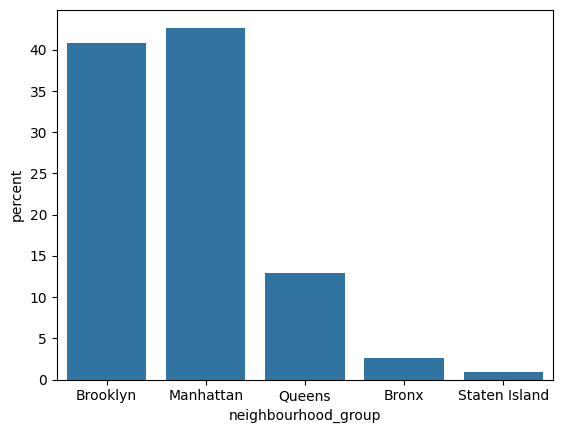

In [99]:
sns.countplot(data= df, x="neighbourhood_group", stat = 'percent')

Airbnb listings in New York City are highly concentrated in `Manhattan` and `Brooklyn` (around 80% is covered by these 2 regions),
which together account for more than 80% of the total market. Queens represents
a secondary market, while the Bronx and Staten Island have minimal Airbnb presence.


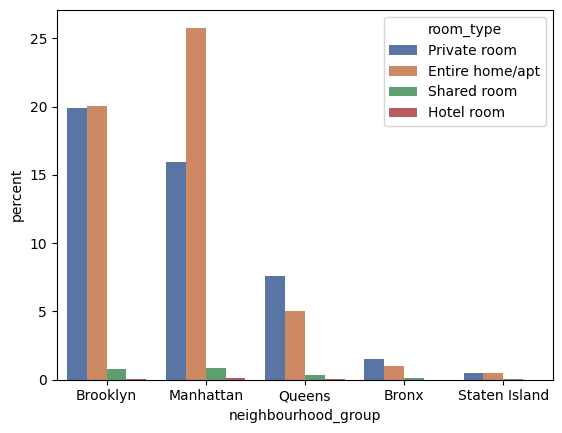

In [102]:
sns.countplot(data= df, x="neighbourhood_group",hue = 'room_type', palette ='deep', stat = 'percent')
plt.show()

The distribution of room types varies significantly by `neighbourhood`. `Manhattan` is
dominated by entire home/apartment listings, while `Brooklyn` shows a more balanced
mix of private rooms and entire homes. `Queens` has a higher proportion of private
rooms, suggesting a more budget-oriented market. Shared and hotel rooms remain
a small fraction across all boroughs.


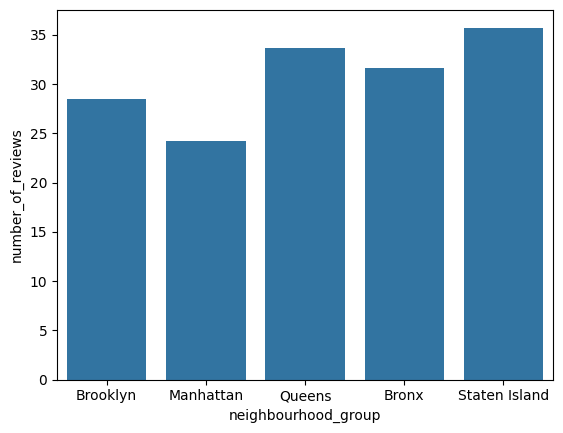

In [117]:
sns.barplot(
    data=data,
    x="neighbourhood_group",
    y="number_of_reviews",
    estimator=np.mean,
    errorbar=None
)
plt.show()


The bar plot illustrates average review counts across boroughs. `Staten Island` and
`Queens` show higher engagement per listing, while `Manhattan`, despite its large
supply, has the lowest average number of reviews per listing.


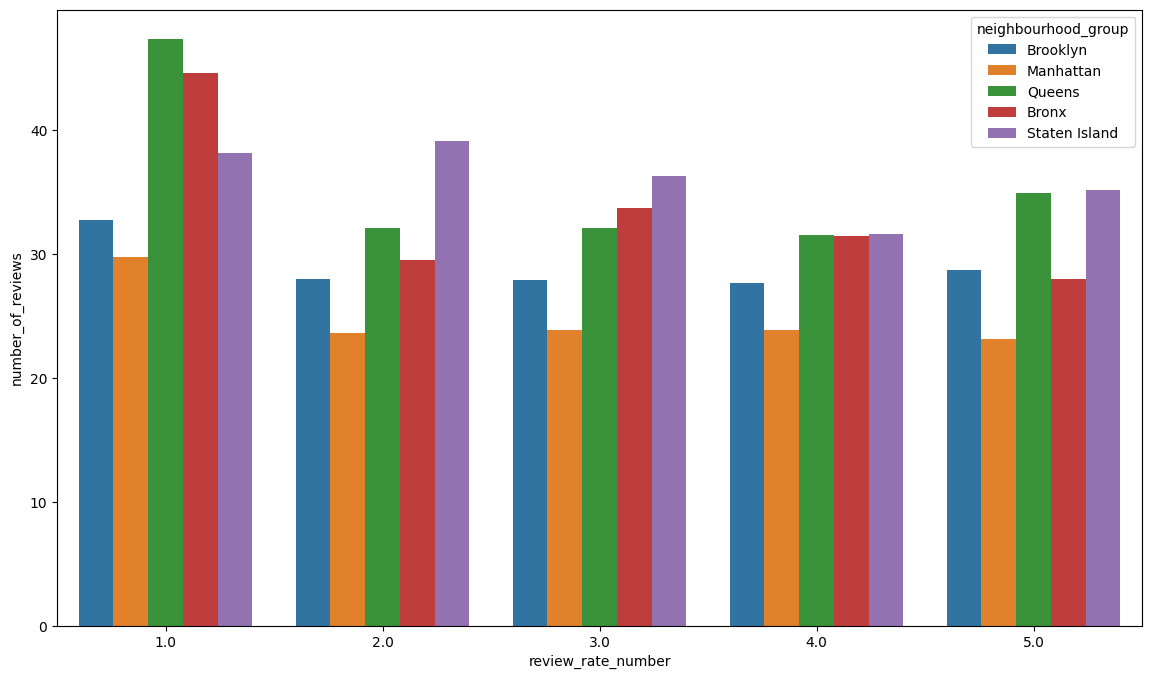

In [127]:
plt.figure(figsize = (14,8))
sns.barplot(
    data=data,
    x="review_rate_number",
    y="number_of_reviews",
    hue="neighbourhood_group",
    estimator=np.mean,
    errorbar=None
)
plt.show()


Comparing average review counts across rating levels and
boroughs. Lower-rated listings often have higher review volumes, suggesting that
review count reflects listing longevity rather than quality. Manhattan listings
consistently receive fewer reviews per listing, likely due to market saturation.


`Instant booking availability` is evenly distributed across price categories.
This suggests that booking flexibility is not strongly influenced by listing
price and is commonly adopted by hosts across all pricing segments.


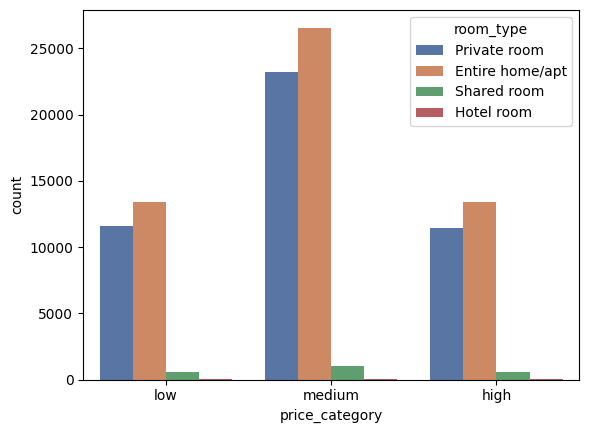

In [104]:
sns.countplot(data = df,x = 'price_category', hue = 'room_type', palette = 'deep')
plt.show()

`Entire home/apartment listings` dominate across all price categories, particularly
in the medium and high segments. `Private rooms` are more prevalent in lower-priced
categories, while shared and hotel rooms remain niche across all price ranges.


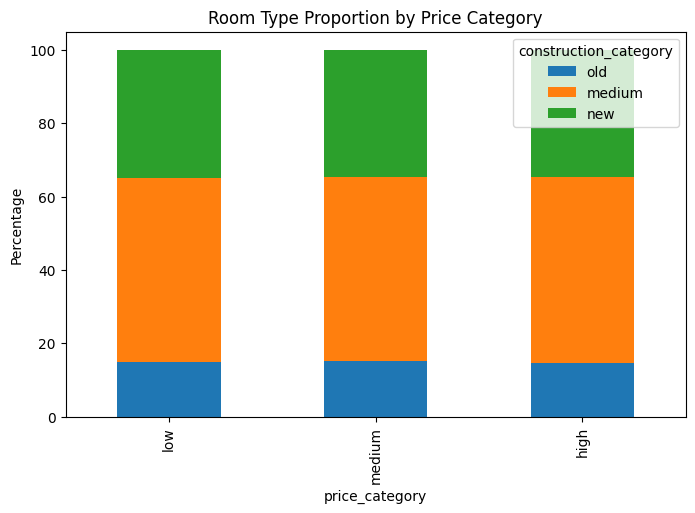

In [108]:

ct = pd.crosstab(data['price_category'], data['construction_category'], normalize='index') * 100

ct.plot(
    kind='bar',
    stacked=True,
    figsize=(8,5)
)

plt.ylabel("Percentage")
plt.title("Room Type Proportion by Price Category")
plt.show()


A 100% stacked bar chart was used to examine the relationship between price
category and construction age. Medium-aged buildings dominate across all price
segments, while newer constructions are slightly more prevalent in higher-priced
listings.


<Axes: xlabel='neighbourhood_group', ylabel='percent'>

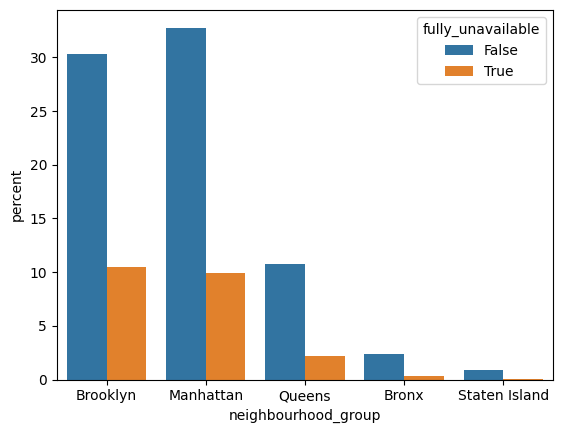

In [130]:
sns.countplot(data= df, x="neighbourhood_group", hue ='fully_unavailable' ,stat = 'percent')

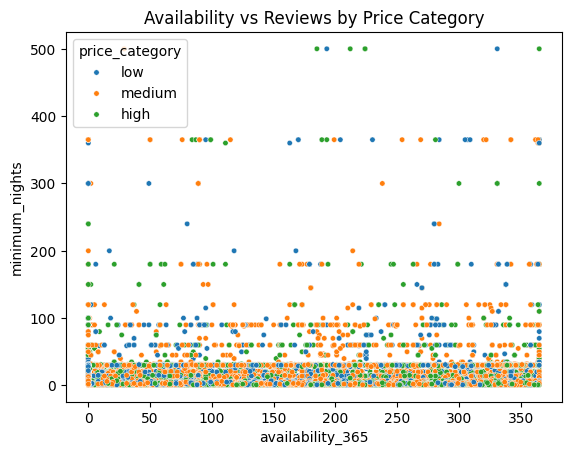

In [112]:
sns.scatterplot(
    data=data,
    x="availability_365",
    y="minimum_nights",
    hue="price_category",
    s=15
)
plt.title("Availability vs Reviews by Price Category")
plt.show()

Lets check depending on the reviews

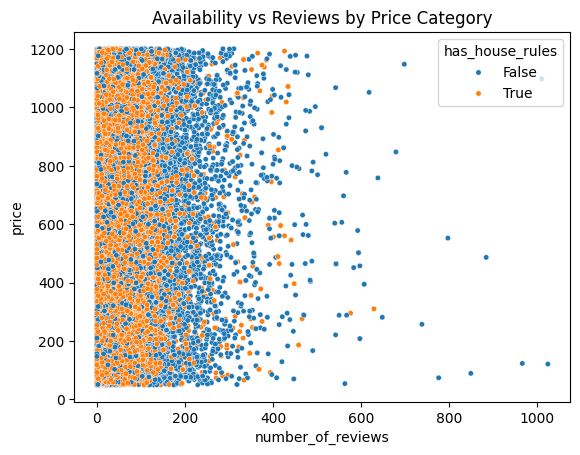

In [136]:
sns.scatterplot(
    data=data,
    x="number_of_reviews",
    y="price",
    hue="has_house_rules",
    s=15
)
plt.title("Availability vs Reviews by Price Category")
plt.show()

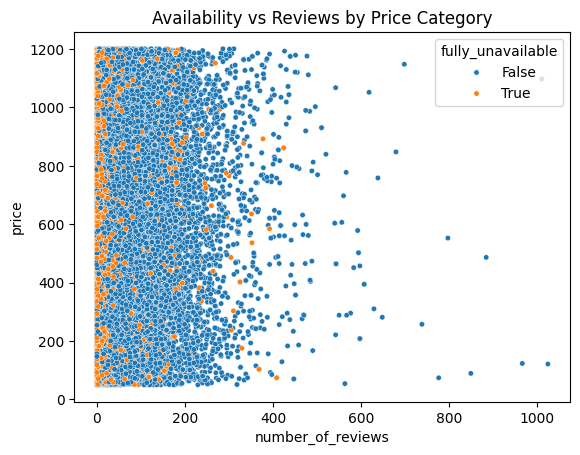

In [140]:
sns.scatterplot(
    data=data,
    x="number_of_reviews",
    y="price",
    hue="fully_unavailable",
    s=15
)
plt.title("Availability vs Reviews by Price Category")
plt.show()

The scatter plot compares `price` and `review volume` while highlighting fully
unavailable listings. Fully unavailable listings cluster at lower review counts,
suggesting inactivity or recent listing creation rather than high demand.
Price shows no strong linear relationship with review volume.The scatter plot compares price and review volume while highlighting fully
unavailable listings. Fully unavailable listings cluster at lower review counts,
suggesting inactivity or recent listing creation rather than high demand.
Price shows no strong linear relationship with review volume.



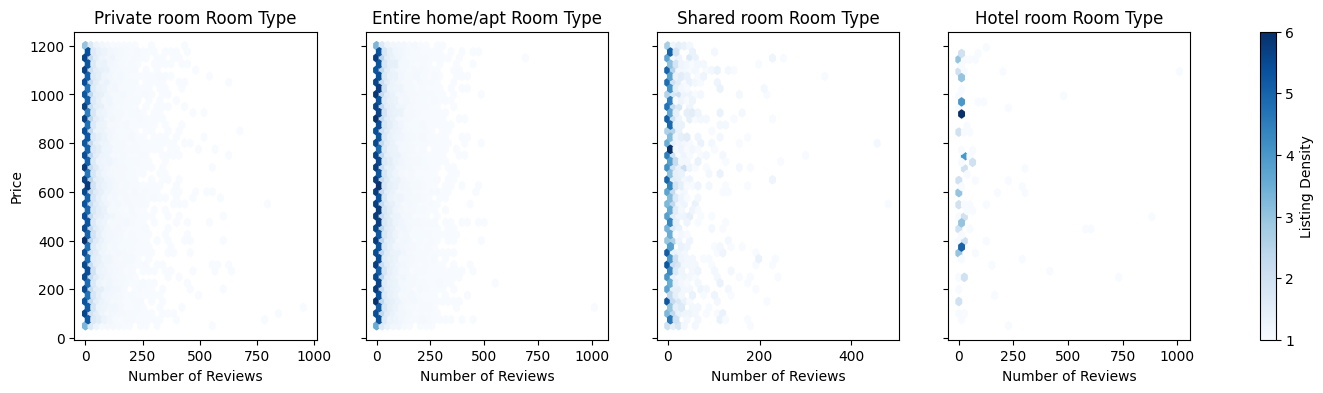

In [156]:
categories = data['room_type'].unique()

fig, axes = plt.subplots(1, len(categories), figsize=(18, 4), sharey=True)

for ax, cat in zip(axes, categories):
    subset = data[data['room_type'] == cat]

    hb = ax.hexbin(
        subset['number_of_reviews'],
        subset['price'],
        gridsize=40,
        cmap='Blues',
        mincnt=1
    )
    ax.set_title(f"{cat.capitalize()} Room Type")
    ax.set_xlabel("Number of Reviews")

axes[0].set_ylabel("Price")
fig.colorbar(hb, ax=axes, label="Listing Density")
plt.show()

The scatter plot highlights how engagement and pricing vary by room type.
Entire homes and private rooms dominate the market and sustain higher review
volumes over time, while shared and hotel rooms remain niche. Review count shows
no strong linear relationship with price.


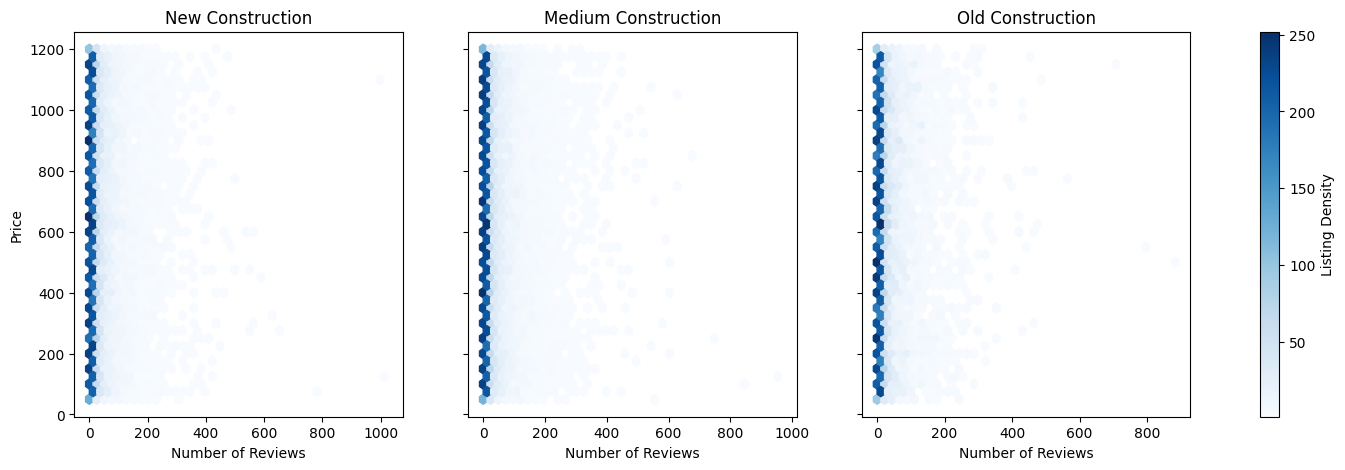

In [158]:
categories = data['construction_category'].unique()

fig, axes = plt.subplots(1, len(categories), figsize=(18, 5), sharey=True)

for ax, cat in zip(axes, categories):
    subset = data[data['construction_category'] == cat]

    hb = ax.hexbin(
        subset['number_of_reviews'],
        subset['price'],
        gridsize=40,
        cmap='Blues',
        mincnt=1
    )
    ax.set_title(f"{cat.capitalize()} Construction")
    ax.set_xlabel("Number of Reviews")

axes[0].set_ylabel("Price")
fig.colorbar(hb, ax=axes, label="Listing Density")

plt.show()

Use hexbin/KDE to reduce overplotting

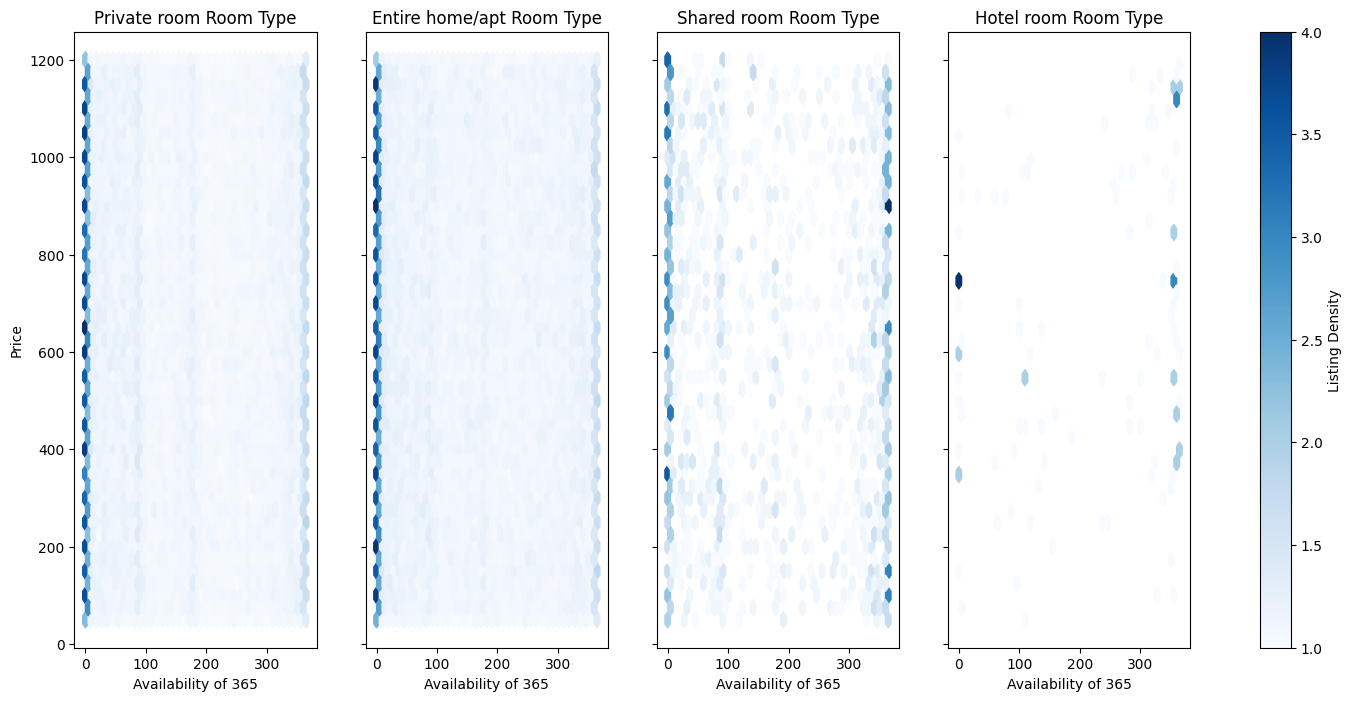

In [161]:
categories = data['room_type'].unique()

fig, axes = plt.subplots(1, len(categories), figsize=(18, 8), sharey=True)

for ax, cat in zip(axes, categories):
    subset = data[data['room_type'] == cat]

    hb = ax.hexbin(
        subset['availability_365'],
        subset['price'],
        gridsize=40,
        cmap='Blues',
        mincnt=1
    )
    ax.set_title(f"{cat.capitalize()} Room Type")
    ax.set_xlabel("Availability of 365")

axes[0].set_ylabel("Price")
fig.colorbar(hb, ax=axes, label="Listing Density")
plt.show()

Faceted density plots were used to examine the relationship between availability
and price across room types. Private rooms show high booking intensity with low
availability, while entire homes exhibit the widest range of prices and booking
patterns. Shared and hotel rooms remain niche with lower listing density.


In [169]:
df.to_csv('../data/preprocess/airbnb_nyc_cleaned.csv', index = False)